# Mini-project n°2 – Conditional VAEs

Voici la bibliographie que nous avons utilisé : 
- ...

## MNIST data-set and librairies

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms
from torch.utils.data import Dataset
import torchvision.transforms.functional as functional
import torch.nn as nn
from torchvision.datasets import FashionMNIST 


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### On télécharge le dataset MNIST

In [4]:
transform = transforms.Compose([transforms.ToTensor(),])

train_dataset = FashionMNIST(root=".",train=True,download=True,transform=transform)
test_dataset = FashionMNIST(root=".",train=False,download=True,transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=64,shuffle=False)

print("taille du data_set d'entrainement:",len(train_dataset))
print("taille du data_set de test:",len(test_dataset))

taille du data_set d'entrainement: 60000
taille du data_set de test: 10000


On visualise un exemple de chaque classe

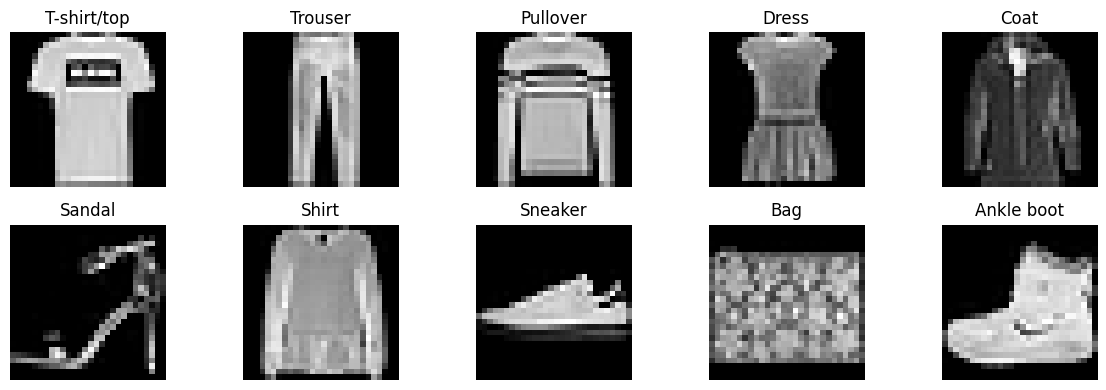

In [6]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] # Les 10 classes de Fashion-MNIST

examples = {}

for img, label in train_dataset:
    if label not in examples:
        examples[label] = img
    if len(examples) == 10:
        break

# Affichage
plt.figure(figsize=(12, 4))
for label, img in examples.items():
    plt.subplot(2, 5, label + 1)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(classes[label])
    plt.axis("off")

plt.tight_layout()
plt.show()

In [20]:
class BaselineNet(nn.Module):
    def __init__(self, hidden_1, hidden_2):
        super().__init__()
        self.fc1 = nn.Linear(784, hidden_1)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        self.fc3 = nn.Linear(hidden_2, 784)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 784)
        hidden = self.relu(self.fc1(x))
        hidden = self.relu(self.fc2(hidden))
        y = torch.sigmoid(self.fc3(hidden))
        return y

In [ ]:
class MaskedBCELoss(nn.Module):
    def __init__(self, masked_with=-1):
        super().__init__()
        self.masked_with = masked_with

    def forward(self, input, target):
        target = target.view(input.shape)
        loss = F.binary_cross_entropy(input, target, reduction='none')
        loss[target == self.masked_with] = 0
        return loss.sum()